In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [97]:
df=pd.read_csv('/content/sentiment_dataset.csv')
df.head()

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative


In [98]:
df.shape

(584, 2)

In [99]:
df.describe()

,message,sentiment
count,584,584
unique,546,3
top,I have no opinion on this,neutral
freq,5,259


In [100]:
df.count()

message      584
sentiment    584
dtype: int64

In [101]:
count_row = df.shape[0]  # Gives number of rows
count_col = df.shape[1]  # Gives number of columns
print(count_row)
print(count_col)

584
2


**Handling missing values**

In [102]:
df.isnull()

,message,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
579,False,False
580,False,False
581,False,False
582,False,False


**Droppping the empty rows and columns**

In [103]:
df.dropna()

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative
...,...,...
579,I have to cancel my vacation plans because I c...,negative
580,My computer crashed and I lost all my importan...,negative
581,I got into a car accident and my car is totale...,negative
582,I have a cold and can't stop coughing. it's re...,negative


In [104]:
df['sentiment'].value_counts()

neutral     259
positive    178
negative    147
Name: sentiment, dtype: int64


**Data visualization**

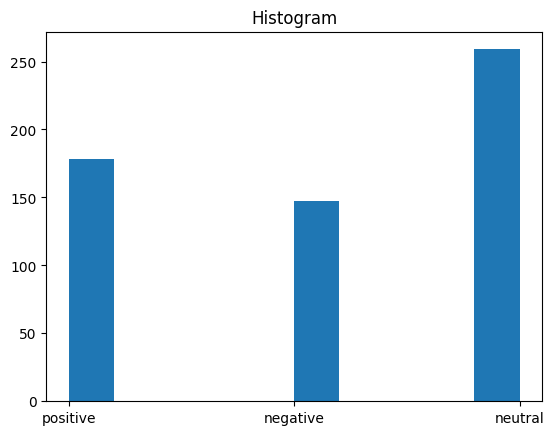

In [105]:
plt.hist(df['sentiment'])
plt.title("Histogram")
plt.show()

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   message    584 non-null    object
 1   sentiment  584 non-null    object
dtypes: object(2)
memory usage: 9.2+ KB


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [108]:
tfidf_vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['message'])
y = df['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 **Logistic Regression**

In [109]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)

print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))


# Example of using the model to predict sentiment for new text
new_text = ["I am  really happy with this service"]
new_text_vectorized = tfidf_vectorizer.transform(new_text)
predicted_sentiment = model.predict(new_text_vectorized)
print(f'Predicted Sentiment: {predicted_sentiment[0]}')

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.53      0.70        30
     neutral       0.76      0.96      0.85        54
    positive       0.82      0.82      0.82        33

    accuracy                           0.81       117
   macro avg       0.86      0.77      0.79       117
weighted avg       0.84      0.81      0.80       117

Confusion matrix
[[16 10  4]
 [ 0 52  2]
 [ 0  6 27]]
Predicted Sentiment: positive


**Naive bayes classifier**

In [110]:
# Train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Generate a classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))

# Example of using the model to predict sentiment for new text
new_text = ["It’s just my opinion, but I find being “neutral” is a very good mental platform from which to view a large part of life."]
new_text_vectorized = tfidf_vectorizer.transform(new_text)
predicted_sentiment = nb_classifier.predict(new_text_vectorized)
print(f'Predicted Sentiment: {predicted_sentiment[0]}')

Accuracy: 0.7436
              precision    recall  f1-score   support

    negative       1.00      0.33      0.50        30
     neutral       0.68      0.94      0.79        54
    positive       0.81      0.79      0.80        33

    accuracy                           0.74       117
   macro avg       0.83      0.69      0.70       117
weighted avg       0.80      0.74      0.72       117

Confusion matrix
[[10 17  3]
 [ 0 51  3]
 [ 0  7 26]]
Predicted Sentiment: neutral


**Support Vector Machine**

In [111]:
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')  # One-vs-Rest (OvR) for multi-class

# Fit the SVM classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy:.2f}')

print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))

# Example of using the model to predict sentiment for new text
new_text = ["It was a bad service."]
new_text_vectorized = tfidf_vectorizer.transform(new_text)
predicted_sentiment = svm_classifier.predict(new_text_vectorized)
print(f'Predicted Sentiment: {predicted_sentiment[0]}')


SVM Accuracy: 0.83
Confusion matrix
[[18  7  5]
 [ 3 49  2]
 [ 1  2 30]]
Predicted Sentiment: negative
